# Three-Dimensional Plotting

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
Three-dimensional plots are enabled by importing the `mplot3d` toolkit, included with the main Matplotlib installation:

In [3]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any of the normal axes creation routines, as shown here (see the following figure):

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically, in the notebook; recall that to use interactive figures, you can use `%matplotlib notebook` rather than `%matplotlib inline` when running this code.

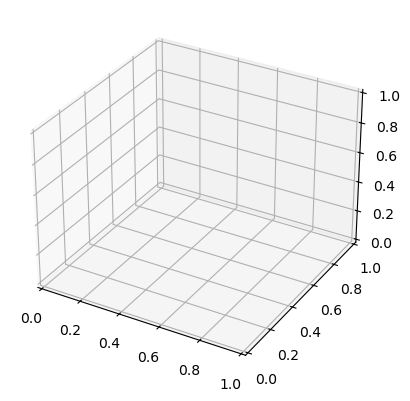

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.show()

## Three-Dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plots created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line (see the following figure):

### 2D Sin & Cos

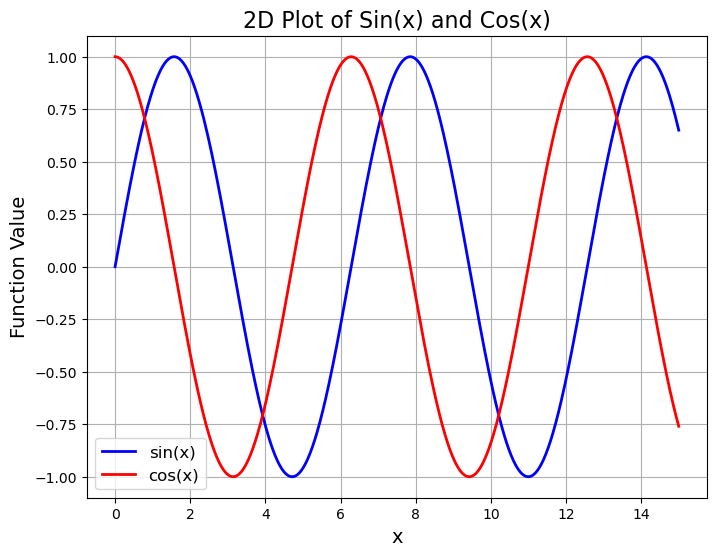

In [13]:
# Generate x values from 0 to 15
x = np.linspace(0, 15, 1000)

# Compute sin(x) and cos(x)
sin_x = np.sin(x)
cos_x = np.cos(x)

# Create a figure with a specific size (width x height in inches)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the sine function in blue and cosine function in red
ax.plot(x, sin_x, label='sin(x)', color='blue', linewidth=2)
ax.plot(x, cos_x, label='cos(x)', color='red', linewidth=2)

# Set axis labels and title with custom font sizes
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('Function Value', fontsize=14)
ax.set_title('2D Plot of Sin(x) and Cos(x)', fontsize=16)

# Add a legend and grid
ax.legend(fontsize=12)
ax.grid(True)

# Display the plot
plt.show()

### 3D Sin & Cos

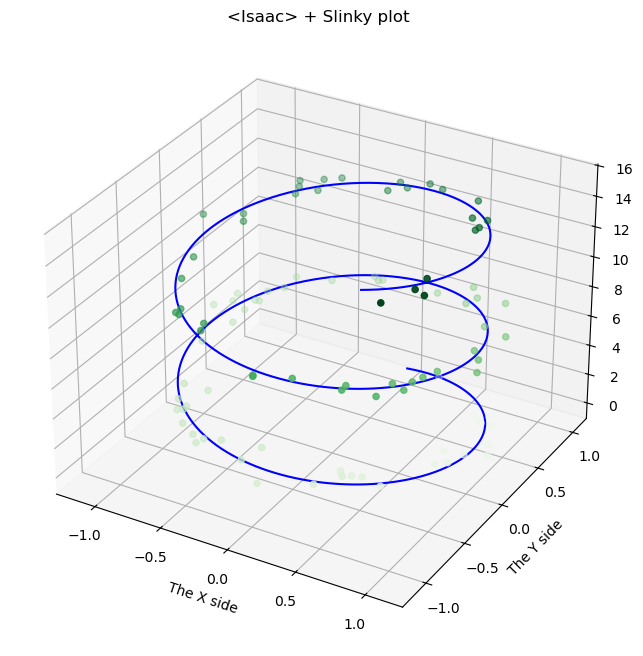

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'blue')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

"""Add some labels"""
plt.title('<Isaac> + Slinky plot')
# x, y labels
plt.xlabel('The X side')
plt.ylabel('The Y side')
plt.show()

Notice that scatter points have their transparency adjusted to give a sense of depth on the page.
While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

## Three-Dimensional Contour Plots

A contour plot can be created with the plt.contour function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. 

`mplot3d` contains tools to create three-dimensional relief plots using the same inputs.
Like `ax.contour`, `ax.contour3D` requires all the input data to be in the form of two-dimensional regular grids, with the *z* data evaluated at each point.
Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function (see the following figure):

In [26]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

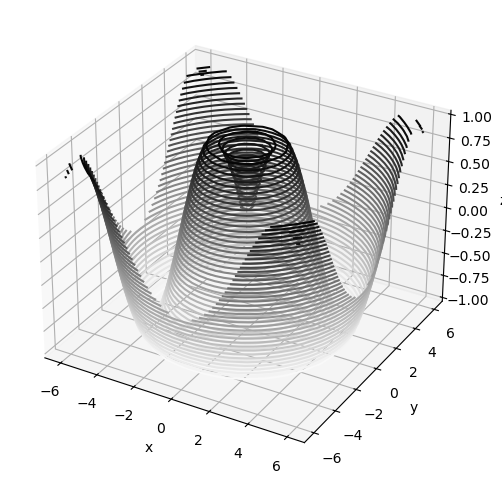

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

Sometimes the default viewing angle is not optimal, in which case we can use the `view_init` method to set the elevation and azimuthal angles. In the following example, visualized in the following figure, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

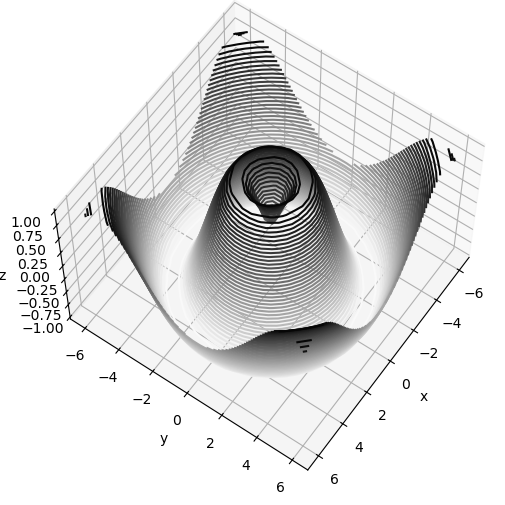

In [31]:
ax.view_init(60, 35)
fig

Again, note that this type of rotation can be accomplished interactively by clicking and dragging when using one of Matplotlib's interactive backends.

## Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots.
These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize.
Here's an example of using a wireframe (see the following figure):

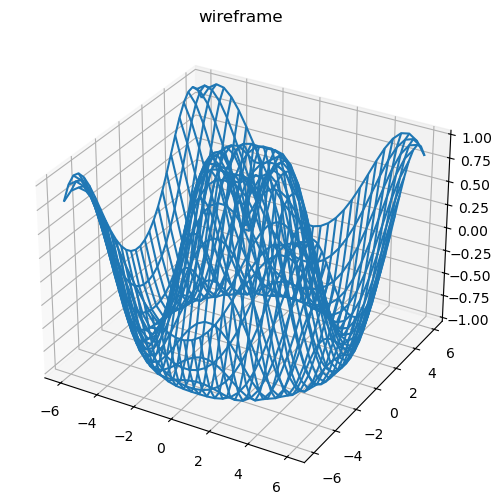

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_title('wireframe');
plt.show()

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon.
Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized, as you can see in the following figure:

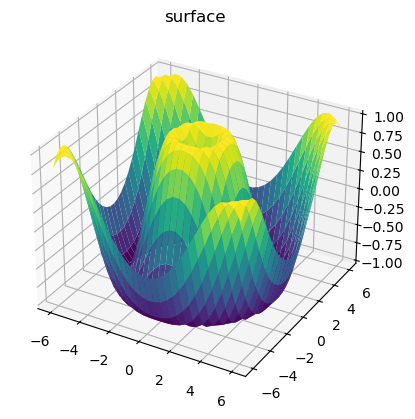

In [38]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.show()

Though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
Here is an example of creating a partial polar grid, which when used with the `surface3D` plot can give us a slice into the function we're visualizing (see the following figure):

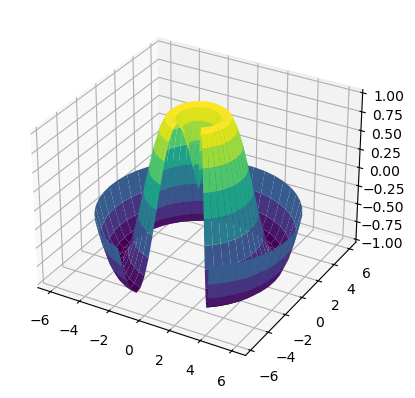

In [41]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
plt.show()

## Surface Triangulations

For some applications, the evenly sampled grids required by the preceding routines are too restrictive.
In these situations, triangulation-based plots can come in handy.
What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [44]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

We could create a scatter plot of the points to get an idea of the surface we're sampling from, as shown in the following figure:

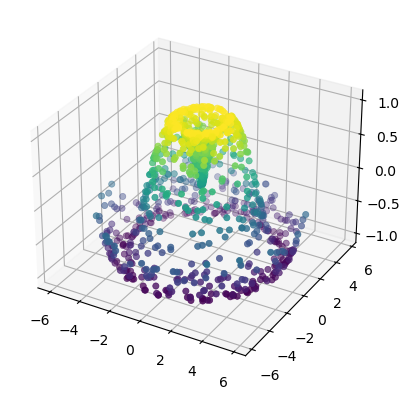

In [47]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);
plt.show()

This point cloud leaves a lot to be desired.
The function that will help us in this case is `ax.plot_trisurf`, which creates a surface by first finding a set of triangles formed between adjacent points (remember that `x`, `y`, and `z` here are one-dimensional arrays); the following figure shows the result:

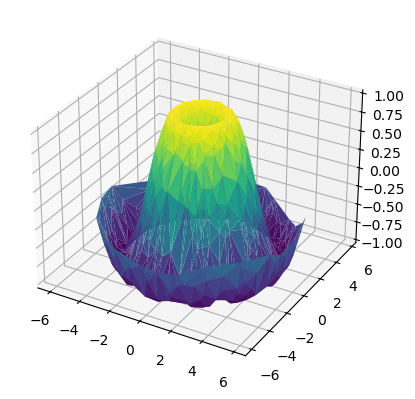

In [50]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');
plt.show()

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots.
For example, it is actually possible to plot a three-dimensional Möbius strip using this, as we'll see next.

## Example: iris Data

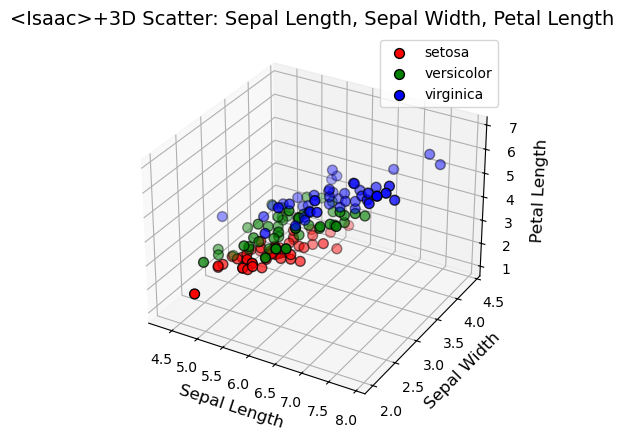

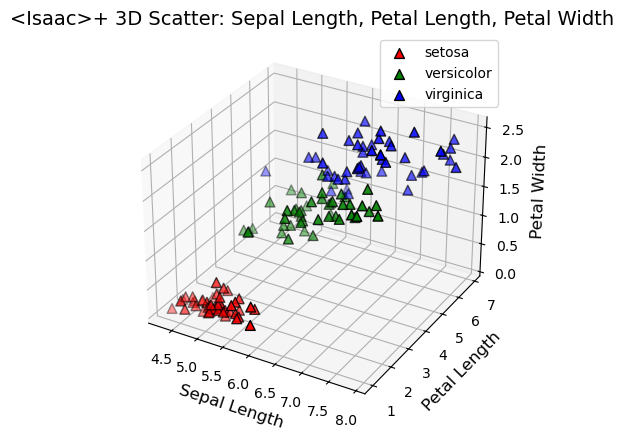

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting
import seaborn as sns

# Load the Iris dataset from seaborn
iris = sns.load_dataset("iris")

# Define a color map for species
species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Visualization 1:
# 3D scatter plot using sepal_length, sepal_width, and petal_length
# ----------------------------
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
for sp in iris['species'].unique():
    subset = iris[iris['species'] == sp]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'],
               c=species_colors[sp], label=sp, s=50, edgecolor='k')
ax.set_xlabel("Sepal Length", fontsize=12)
ax.set_ylabel("Sepal Width", fontsize=12)
ax.set_zlabel("Petal Length", fontsize=12)
ax.set_title("<Isaac>+3D Scatter: Sepal Length, Sepal Width, Petal Length", fontsize=14)
ax.legend(fontsize=10)
plt.show()


# Visualization 2:
# 3D scatter plot using sepal_length, petal_length, and petal_width
# ----------------------------
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
for sp in iris['species'].unique():
    subset = iris[iris['species'] == sp]
    ax.scatter(subset['sepal_length'], subset['petal_length'], subset['petal_width'],
               c=species_colors[sp], label=sp, s=50, marker='^', edgecolor='k')
ax.set_xlabel("Sepal Length", fontsize=12)
ax.set_ylabel("Petal Length", fontsize=12)
ax.set_zlabel("Petal Width", fontsize=12)
ax.set_title("<Isaac>+ 3D Scatter: Sepal Length, Petal Length, Petal Width", fontsize=14)
ax.legend(fontsize=10)
plt.show()


### Analysis:

**Alternative Feature Combination**:
By plotting sepal length, petal length, and petal width, this visualization shifts focus away from sepal width and instead emphasizes the petal dimensions alongside sepal length. The strong differentiation in petal dimensions becomes more apparent, especially for Iris setosa, which generally exhibits significantly smaller petal width and length compared to the other species.

**Clustering**:
The spatial arrangement in this plot often reveals a tighter clustering for setosa, while versicolor and virginica might appear closer together with some overlapping regions. This overlap suggests that, although petal measurements are powerful discriminators, additional features (like sepal width) might be necessary to fully separate versicolor from virginica.

**Data Trends and Outliers**:
The visualization may also highlight outliers—individual points that deviate from the expected cluster patterns. These outliers can be crucial for understanding variability within species or identifying potential measurement errors.

**Limitation**:
As with the first plot, the 3D scatter chart here is static. The inability to interactively manipulate the view (e.g., rotating, zooming) makes it harder for viewers to thoroughly explore the spatial distribution. This limitation can hinder a comprehensive understanding of complex inter-feature relationships, particularly when clusters overlap or when subtle trends are present.



### 3D with plotly Go

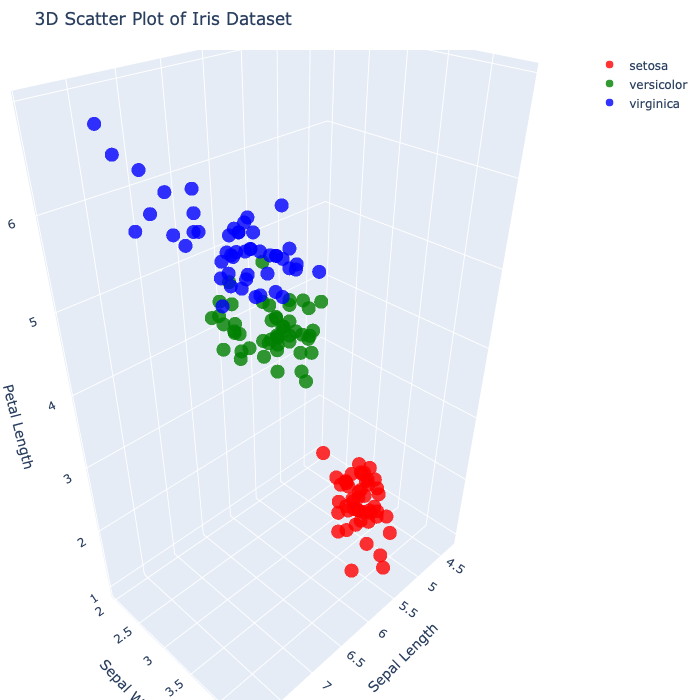

In [63]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# # Load the Iris dataset from Seaborn
# iris = sns.load_dataset("iris")

# Define a color mapping for each species
species_colors = {"setosa": "red", "versicolor": "green", "virginica": "blue"}

# Create an empty figure
fig = go.Figure()

# For each species, add a 3D scatter trace
for species in iris["species"].unique():
    # Filter the data for the current species
    subset = iris[iris["species"] == species]
    # Add a 3D scatter trace for this species
    fig.add_trace(go.Scatter3d(
        x=subset["sepal_length"],    # x-axis: sepal length
        y=subset["sepal_width"],     # y-axis: sepal width
        z=subset["petal_length"],    # z-axis: petal length
        mode="markers",              # display as points
        marker=dict(
            size=8,                  # marker size
            color=species_colors[species],  # color by species
            opacity=0.8              # marker opacity
        ),
        name=species                # trace name for the legend
    ))

# Update the layout to set titles and size
fig.update_layout(
    title="3D Scatter Plot of Iris Dataset",
    scene=dict(
        xaxis_title="Sepal Length",
        yaxis_title="Sepal Width",
        zaxis_title="Petal Length"
    ),
    width=700,                    # Figure width in pixels
    height=700,                   # Figure height in pixels
    margin=dict(l=0, r=0, b=0, t=50)  # Margins around the plot
)

# Display the interactive 3D plot
fig.show()


### Observations
**Expressiveness**:
The plot is expressive as it uses three axes to capture the variability in the dataset, while distinct colors for each species provide an immediate visual cue to differences among the groups. This design makes it easy to spot patterns, clusters, and potential outliers.

**Effectiveness**:
Clear axis labels, a descriptive title, and appropriate color schemes ensure that the visualization is not only aesthetically pleasing but also informative. The spatial arrangement effectively communicates the relative differences among species, supporting further analysis, such as feature selection and classification.

**Big takeaway**:
By mapping three features onto the x, y, and z axes, the plot provides a clear view of how the different measurements interact. This multidimensional perspective reveals the natural clustering of Iris species and helps identify which features contribute most to species separation.
The 3D scatter plot distills complex, multivariate information into an accessible visual form. It highlights the key features that differentiate the Iris species and demonstrates how interactivity can deepen our understanding of data relationships. This makes the plot a powerful tool for exploratory data analysis and model development in machine learning.

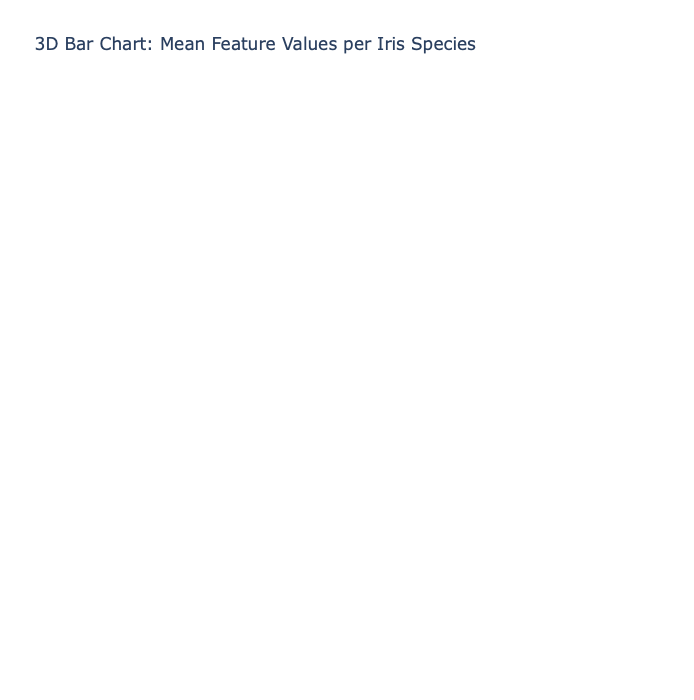

In [69]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Load the Iris dataset and compute mean values per species for each feature
# iris = sns.load_dataset("iris")
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = iris['species'].unique()
group_means = iris.groupby('species')[features].mean()

# Define colors for each species
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Set bar dimensions in x and y directions
dx, dy = 0.3, 0.3

traces = []
for i, sp in enumerate(species):
    for j, feat in enumerate(features):
        height = group_means.loc[sp, feat]
        # Define base coordinates for the bar (centered at (i, j))
        x0, x1 = i - dx/2, i + dx/2
        y0, y1 = j - dy/2, j + dy/2
        # Define the 8 vertices of the bar
        vertices = np.array([
            [x0, y0, 0], [x1, y0, 0], [x1, y1, 0], [x0, y1, 0],
            [x0, y0, height], [x1, y0, height], [x1, y1, height], [x0, y1, height]
        ])
        # Define faces by splitting each rectangular face into two triangles
        faces = [[0, 1, 2], [0, 2, 3],  # bottom
                 [4, 5, 6], [4, 6, 7],  # top
                 [0, 1, 5], [0, 5, 4],  # front
                 [1, 2, 6], [1, 6, 5],  # right
                 [2, 3, 7], [2, 7, 6],  # back
                 [3, 0, 4], [3, 4, 7]]  # left
        i_faces, j_faces, k_faces = zip(*faces)
        # Create a Mesh3d trace for the bar
        traces.append(go.Mesh3d(
            x=vertices[:, 0],
            y=vertices[:, 1],
            z=vertices[:, 2],
            i=i_faces, j=j_faces, k=k_faces,
            color=colors[sp],
            opacity=0.8,
            name=f"{sp} - {feat}"
        ))

# Build and update the figure layout
fig = go.Figure(data=traces)
fig.update_layout(
    title="3D Bar Chart: Mean Feature Values per Iris Species",
    scene=dict(
        xaxis=dict(title="Species", tickvals=list(range(len(species))), ticktext=list(species)),
        yaxis=dict(title="Features", tickvals=list(range(len(features))), ticktext=features),
        zaxis=dict(title="Mean Value")
    ),
    width=700,
    height=700
)

fig.show()


### Observations
**Expressiveness**:
This 3D bar chart effectively maps three dimensions: species (x-axis), features (y-axis), and their corresponding mean values (z-axis). The distinct colors for each species (red, green, blue) make it immediately clear which bars belong to which group, enabling quick comparisons across different features.

**Effectiveness**:
The visualization is effective because it organizes complex multivariate data into a spatial format that is intuitive to read. The clear axis labels and title guide the viewer, while the interactive 3D plot allows users to rotate the view and better assess the differences in mean values. The bars clearly convey which species have higher or lower measurements for specific features, supporting data-driven insights and decision-making.

**Big takeaway**:
The 3D bar chart reveals clear differences in the mean values of each feature across species. For example, one might observe that Iris setosa has distinctly lower mean values for petal length and petal width compared to Iris versicolor and Iris virginica. Such differences are crucial for species classification.
This visualization not only summarizes complex, multivariate data into an accessible format but also highlights the key features that differentiate Iris species. Such insights are essential for tasks like classification, feature selection, and further statistical analysis in data science and machine learning applications.

### Mt Bruno Elevation example with plotly go

The Mt Bruno Elevation dataset is a collection of elevation measurements for Mt Bruno. Each entry in the dataset represents an elevation value (in meters) arranged in a grid format. This grid structure allows for the reconstruction of a digital elevation model (DEM) of the mountain's terrain.

In [74]:
# Read data from a CSV URL containing elevation data for Mt Bruno
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,27.809850,49.61936,83.080670,116.66320,130.41400,150.72060,220.1871,156.1536,148.6416,...,49.96142,21.89279,17.02552,11.743170,14.752260,13.667100,5.677561,3.312340,1.156517,-0.147662
1,1,27.719660,48.55022,65.213740,95.27666,116.99640,133.90560,152.3412,151.9340,160.1139,...,33.08871,38.40972,44.24843,69.578600,4.019351,3.050024,3.039719,2.996142,2.967954,1.999594
2,2,30.426700,33.47752,44.809530,62.47495,77.43523,104.21530,102.7393,137.0004,186.0706,...,48.47132,74.71461,60.09090,7.073525,6.089851,6.537450,6.666096,7.306965,5.736840,3.625628
3,3,16.665490,30.10860,39.969520,44.12225,59.57512,77.56929,106.8925,166.5539,175.2381,...,60.55916,55.92124,15.17284,8.248324,36.680870,61.934130,20.268670,68.588190,46.498120,0.236010
4,4,8.815617,18.35160,8.658275,27.58590,48.62691,60.18013,91.3286,145.7109,116.0653,...,47.42691,69.20731,44.95468,29.171970,17.916740,16.255150,14.655590,17.260480,31.222450,46.717040


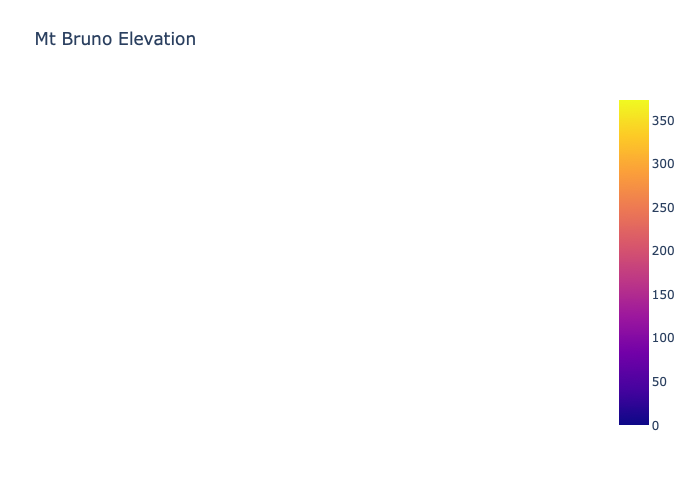

In [76]:
# Create a Figure with a Surface plot using the elevation data
fig = go.Figure(data=[go.Surface(z=z_data.values)])

# Update the surface trace with contour lines on the z-axis
fig.update_traces(
    contours_z=dict(
        show=True,          # Display the contour lines
        usecolormap=True,   # Use the surface's colormap for the contours
        highlightcolor="limegreen",  # Set the highlight color for contours
        project_z=True      # Project the contours onto the z-plane
    )
)

# Update the layout of the figure:
fig.update_layout(
    title=dict(text='Mt Bruno Elevation'),  # Set the plot title
    autosize=False,                           # Disable automatic sizing
    scene=dict(
        # Custom axis labels
        xaxis=dict(title='X Coordinate'),
        yaxis=dict(title='Y Coordinate'),
        zaxis=dict(title='Elevation (m)'),
        camera_eye=dict(x=1.87, y=0.88, z=-0.64)
    ),
    width=500,    # Set the width of the figure
    height=500,   # Set the height of the figure
    margin=dict(l=65, r=50, b=65, t=90)  # Set custom margins for the figure layout
)

# Render and display the figure
fig.show()

### Practice: Using the provided data, create a series of interactive 3D plots using Plotly's graph_objects. 

- Set the initial camera view to a top-down perspective. 
- Make sure to clearly label all axes and include your full name in the plot title.

In [79]:
# data
z1 = np.array([
    [8.83,8.89,8.81,8.87,8.9,8.87],
    [8.89,8.94,8.85,8.94,8.96,8.92],
    [8.84,8.9,8.82,8.92,8.93,8.91],
    [8.79,8.85,8.79,8.9,8.94,8.92],
    [8.79,8.88,8.81,8.9,8.95,8.92],
    [8.8,8.82,8.78,8.91,8.94,8.92],
    [8.75,8.78,8.77,8.91,8.95,8.92],
    [8.8,8.8,8.77,8.91,8.95,8.94],
    [8.74,8.81,8.76,8.93,8.98,8.99],
    [8.89,8.99,8.92,9.1,9.13,9.11],
    [8.97,8.97,8.91,9.09,9.11,9.11],
    [9.04,9.08,9.05,9.25,9.28,9.27],
    [9,9.01,9,9.2,9.23,9.2],
    [8.99,8.99,8.98,9.18,9.2,9.19],
    [8.93,8.97,8.97,9.18,9.2,9.18]
])

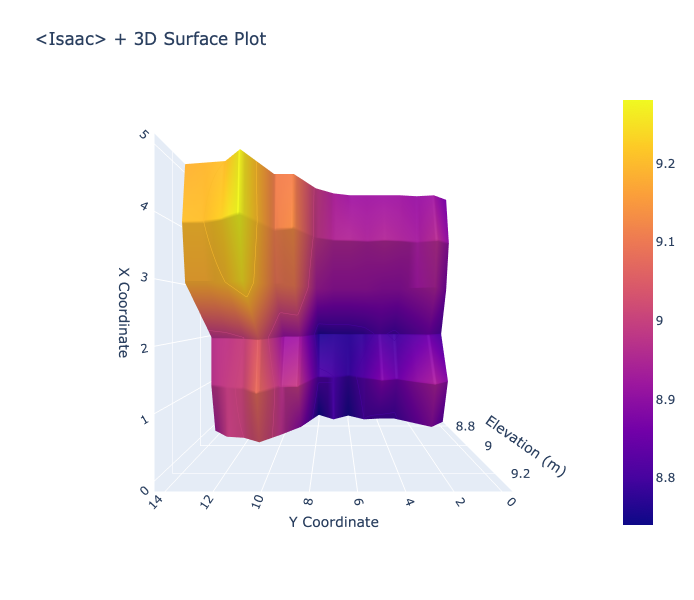

In [85]:
# Your code
import plotly.graph_objects as go
import numpy as np

# Create a Figure with a Surface plot
fig = go.Figure(data=[go.Surface(z=z1)])

# Update the surface trace
fig.update_traces(
    contours_z=dict(
        show=True,
        usecolormap=True,
        highlightcolor="blue",
        project_z=True
    )
)

# Update layout
fig.update_layout(
    title="<Isaac> + 3D Surface Plot",
    scene=dict(
        xaxis_title="X Coordinate",
        yaxis_title="Y Coordinate",
        zaxis_title="Elevation (m)",
        camera_eye=dict(x=0, y=0, z=2)
    ),
    width=600,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Display the figure
fig.show()
